Point velocity from ablation stake coordinates as measured during Rapid Static surveys

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib
import geopandas
import math

path = '/home/pelto/src/ice_dynamics/'

f_in = 'conrad_points.csv'    #'conrad_points.csv' 

In [2]:
data = pd.read_csv(path + f_in)
data[0:10]

,survey_no,year,date,name,new_old,surv_name,E,N,Elev
0,1,2015,2015-07-16,NaN,NaN,CONK2,505177.5,5631146.0,1889.4
1,1,2015,2015-07-16,NaN,NaN,CONKJ,504922.8,5630804.0,2022.4
2,1,2015,2015-07-16,CST2,new,CONK3,505188.8,5630627.0,2077.3
3,1,2015,2015-07-16,NaN,NaN,CONKWX,505460.7,5630350.0,2125.8
4,1,2015,2015-07-16,NaN,NaN,CONKWX2,505544.5,5630157.0,2148.2
5,1,2015,2015-07-16,NaN,NaN,CONKIN,505215.9,5629867.0,2209.1
6,1,2015,2015-07-16,NaN,NaN,CONKINK,505278.0,5629838.0,2206.0
7,1,2015,2015-07-16,CST3,old,CONKINK3,505542.8,5629937.0,2177.8
8,1,2015,2015-07-16,CST3,new,CONKINK3A,505544.7,5629931.0,2181.7
9,1,2015,2015-07-16,NaN,NaN,CONKINKJ,505475.7,5630744.0,2089.4


also need to calculate velocity (m/yr) and azimuth

In [3]:
data.E = data.E.astype(float)
# data.dtypes
# data.date = date(data.date)
# data

In [4]:
# np.array(start_DATE)[0]

In [5]:
# W=datetime.strptime(np.array(start_DATE)[0],'%Y-%m-%d')
# W.month
# diff_days

In [6]:
# data[(data.survey_no==num-1) & (data.name==n) & (data.new_old=='new')].index[0]

In [7]:
Dis=pd.DataFrame({})
for num in np.arange(2,7,1):  
    T=np.array(data[(data.survey_no==num)&(data.new_old=='old')].name) ##add in 'both'
    for n in T:
        try:
            x=data[(data.survey_no==num-1) & (data.name==n) & (data.new_old=='new')].index[0] ##add in 'both'
        except:
            continue
        else:
            G=data[data.index==x]
            if np.array(G.new_old=='new')[0]:
                eNEW=float(G.E)
                nNEW=float(G.N)
                
                eOLD=float(data[(data.name==n) & (data.survey_no==num)&(data.new_old=='old')].E)
                nOLD=float(data[(data.name==n) & (data.survey_no==num)&(data.new_old=='old')].N)
                
                ##calculate stake displacement (meters) 
                distance = np.sqrt((eNEW - eOLD)**2 + (nNEW - nOLD)**2)
                dist_x = eOLD - eNEW  
                dist_y = nOLD - nNEW  
              
                
                ##calculate time (days) between surveys and then velocity (m/yr)
                start_DATE = (data[(data.name==n) & (data.survey_no==num-1)&(data.new_old=='new')].date)
                end_DATE   = (data[(data.name==n) & (data.survey_no==num)&(data.new_old=='old')].date)
                S_DT=datetime.strptime(np.array(start_DATE)[0],'%Y-%m-%d')
                E_DT=datetime.strptime(np.array(end_DATE)[0],'%Y-%m-%d')
                diff_days  = (E_DT - S_DT).days 
                V = float((distance / diff_days) * 365.)
                
                u = float((dist_x / diff_days) * 365.) 
                v = float((dist_y / diff_days) * 365.) 

                ##calculate azimuth  
    #           https://gis.stackexchange.com/questions/108547/how-to-calculate-distance-azimuth-and-dip-from-two-xyz-coordinates
                az = math.degrees(math.atan2((eOLD - eNEW), (nOLD - nNEW))) 
                         
                Ele=float(data[(data.name==n) & (data.survey_no==num)&(data.new_old=='old')].Elev)
                year=int(data[(data.name==n) & (data.survey_no==num)&(data.new_old=='old')].year)
                
                Dis=Dis.append({'Name':n,'eNew':(eNEW), 'nNew':(nNEW),'eOld':(eOLD),'nOld':(nOLD),
                                'Elevation':Ele,'Year':year, 'Displacement':distance,'time_days':diff_days, 
                                'velocity':V, 'azimuth': az, 'u':u, 'v':v}, ignore_index=True)
                

In [8]:
# data[(data.name==n) & (data.survey_no==num)]#&(data.new_old=='old')].E

In [9]:
Dis

,Displacement,Elevation,Name,Year,azimuth,eNew,eOld,nNew,nOld,time_days,u,v,velocity
0,3.047950,1876.8,CST0,2015.0,48.990913,505139.8,505142.100,5631227.0,5631229.000,52.0,16.144231,14.038462,21.394265
1,6.621178,1968.0,CST1,2015.0,25.016893,504987.4,504990.200,5630982.0,5630988.000,52.0,19.653846,42.115385,46.475577
2,3.720215,2073.4,CST2,2015.0,-36.253838,505188.8,505186.600,5630627.0,5630630.000,52.0,-15.442308,21.057692,26.113048
3,11.605602,2174.6,CST3,2015.0,-18.591068,505544.7,505541.000,5629931.0,5629942.000,52.0,-25.971154,77.211538,81.462399
4,11.605602,1964.7,CST1,2016.0,18.591068,504991.1,504994.800,5630988.0,5630999.000,288.0,4.689236,13.940972,14.708489
5,5.381450,1874.8,CST0,2016.0,41.987212,505142.6,505146.200,5631227.0,5631231.000,288.0,4.562500,5.069444,6.820240
6,25.663983,2172.9,CST3,2016.0,-13.061551,505540.9,505535.100,5629941.0,5629966.000,288.0,-7.350694,31.684028,32.525533
7,1.220656,1871.1,CST0,2016.0,34.992020,505139.4,505140.100,5631225.0,5631226.000,70.0,3.650000,5.214286,6.364847
8,3.440930,2071.1,CST2A,2016.0,-54.462322,504995.0,504992.200,5630419.0,5630421.000,70.0,-14.600000,10.428571,17.941993
9,4.534314,2071.3,CST2B,2016.0,-48.576334,505077.6,505074.200,5630522.0,5630525.000,70.0,-17.728571,15.642857,23.643207


In [10]:
from osgeo import ogr
import matplotlib.path as mpath
import matplotlib.patches as mpatches
# Extract first layer of features from shapefile using OGR
ds = ogr.Open('/home/pelto/Desktop/lidar_cbt_analysis/conrad/Conrad/conrad_17_extent.shp') #GIS/outlines/Conrad_2014.shp')
#ds = ogr.Open('/home/pelto/Desktop/lidar_cbt_analysis/zillmer/Zillmer/surrounding_glaciers_2014_zone10.shp')
nlay = ds.GetLayerCount()
lyr = ds.GetLayer(0)

#####################################################################################################################
paths = []
lyr.ResetReading()

# Read all features in layer and store as paths
for feat in lyr:
    geom = feat.geometry()
    codes = []
    all_x = []
    all_y = []
    for i in range(geom.GetGeometryCount()):
        # Read ring geometry and create path
        r = geom.GetGeometryRef(i)
        x = [r.GetX(j) for j in range(r.GetPointCount())]
        y = [r.GetY(j) for j in range(r.GetPointCount())]
        # skip boundary between individual rings
        codes += [mpath.Path.MOVETO] + \
                     (len(x)-1)*[mpath.Path.LINETO]
        all_x += x
        all_y += y
    path = mpath.Path(np.column_stack((all_x,all_y)), codes)
    paths.append(path)


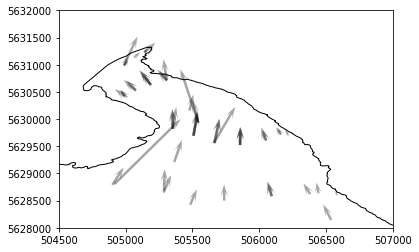

In [19]:
f, ax = plt.subplots(1, 1)
ax.set_xlim(504500,507000)
ax.set_ylim(5628000,5632000)
patch = mpatches.PathPatch(path, facecolor='none', edgecolor='k', linewidth=1.0)
ax.add_patch(patch)
ax.quiver(Dis.eNew, Dis.nNew, Dis.u, Dis.v, color='k', alpha=0.35, headaxislength=3)


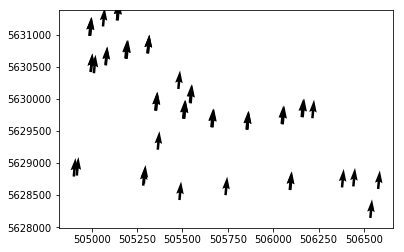

In [12]:
plt.figure()
# gdf = geopandas.read_file('/home/pelto/GIS/outlines/Conrad_2014.shp')

q = plt.quiver(Dis.eNew, Dis.nNew, Dis.eOld, Dis.nOld)

In [13]:
plt.figure()
x = Dis.eNew
y = Dis.nNew
u = 

plt.quiver(x, y, u, v, pivot='middle', transform=transform)

SyntaxError: invalid syntax (<ipython-input-13-5f4d26e8ed5d>, line 4)